In [25]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt

#reading data into dataframes
bc = pd.read_csv("/content/BTC-USD-DEC.csv", index_col=0, parse_dates=True)
et = pd.read_csv("/content/ETH-USD _DEC1.csv",index_col=0,parse_dates=True)
dc = pd.read_csv("/content/DOGE-USD--DEC.csv",index_col=0,parse_dates=True)
usd = pd.read_csv("/content/US Dollar Index Futures Historical Data (1).csv", index_col=0, parse_dates=True)

In [26]:
bc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160
2017-12-06,11923.400391,14369.099609,11923.400391,14291.500000,14291.500000,12656300032
2017-12-07,14266.099609,17899.699219,14057.299805,17899.699219,17899.699219,17950699520
2017-12-08,17802.900391,18353.400391,14336.900391,16569.400391,16569.400391,21135998976
...,...,...,...,...,...,...
2022-11-30,16445.476563,17190.937500,16445.476563,17168.566406,17168.566406,29523576583
2022-12-01,17168.001953,17197.498047,16888.388672,16967.132813,16967.132813,22895392882
2022-12-02,16968.683594,17088.660156,16877.880859,17088.660156,17088.660156,19539705127


In [27]:
et

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-04,466.053986,474.777008,453.312012,470.204010,470.204010,1005550016
2017-12-05,470.294006,473.558014,457.660004,463.281006,463.281006,1216720000
2017-12-06,462.604004,462.708008,420.209991,428.588013,428.588013,1998259968
2017-12-07,426.368988,441.397003,414.411011,434.407990,434.407990,2129570048
2017-12-08,434.989014,466.062012,422.367004,456.031006,456.031006,2336379904
...,...,...,...,...,...,...
2022-12-01,1295.769531,1295.999878,1267.708496,1276.273926,1276.273926,6857935276
2022-12-02,1276.328613,1294.303345,1269.243164,1294.303345,1294.303345,6213645709
2022-12-03,1294.456543,1299.840332,1241.431885,1243.334839,1243.334839,5672609405


In [28]:
dc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-04,0.002206,0.002475,0.002178,0.002463,0.002463,6307150
2017-12-05,0.002474,0.002676,0.002426,0.002479,0.002479,8772420
2017-12-06,0.002495,0.002663,0.002440,0.002663,0.002663,9047960
2017-12-07,0.002581,0.002858,0.002515,0.002720,0.002720,15759300
2017-12-08,0.002730,0.002846,0.002326,0.002779,0.002779,11797600
...,...,...,...,...,...,...
2022-11-30,0.101827,0.108942,0.100304,0.106860,0.106860,1388624554
2022-12-01,0.106857,0.107381,0.101071,0.101584,0.101584,891639200
2022-12-02,0.101594,0.103260,0.097639,0.102148,0.102148,776013992


In [29]:
usd

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-05,104.213,104.463,104.463,104.142,-,-0.27%
2022-12-02,104.500,104.795,105.575,103.935,43.74K,-0.18%
2022-12-01,104.689,105.570,105.860,104.550,43.75K,-1.14%
2022-11-30,105.897,106.660,107.150,105.710,37.35K,-0.82%
2022-11-29,106.768,106.605,106.820,105.995,24.38K,0.13%
...,...,...,...,...,...,...
2017-12-08,93.489,93.440,93.700,93.410,5.92K,0.08%
2017-12-07,93.414,93.235,93.425,93.150,2.48K,0.19%
2017-12-06,93.237,92.990,93.265,92.820,2.20K,0.25%


In [30]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2017-12-04 to 2022-12-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1827 non-null   float64
 1   High       1827 non-null   float64
 2   Low        1827 non-null   float64
 3   Close      1827 non-null   float64
 4   Adj Close  1827 non-null   float64
 5   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [31]:
et.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2017-12-04 to 2022-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


In [32]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2017-12-04 to 2022-12-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1827 non-null   float64
 1   High       1827 non-null   float64
 2   Low        1827 non-null   float64
 3   Close      1827 non-null   float64
 4   Adj Close  1827 non-null   float64
 5   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [33]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293 entries, 2022-12-05 to 2017-12-04
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1293 non-null   float64
 1   Open      1293 non-null   float64
 2   High      1293 non-null   float64
 3   Low       1293 non-null   float64
 4   Vol.      1293 non-null   object 
 5   Change %  1293 non-null   object 
dtypes: float64(4), object(2)
memory usage: 70.7+ KB


In [34]:
bc= bc.drop(bc.columns[[0,1,2,4]], axis=1)
bc.tail()

,Close,Volume
Date,,
2022-11-30,17168.566406,29523576583
2022-12-01,16967.132813,22895392882
2022-12-02,17088.660156,19539705127
2022-12-03,16908.236328,16217776704
2022-12-04,17085.908203,17693550592


In [35]:
usd = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd.head()

,Price
Date,
2022-12-05,104.213
2022-12-02,104.500
2022-12-01,104.689
2022-11-30,105.897
2022-11-29,106.768


In [36]:
print(bc.shape)
print(usd.shape)

(1827, 2)
(1293, 1)


In [37]:
bc.describe()

,Close,Volume
count,1827.000000,1.827000e+03
mean,20318.429058,2.654616e+10
std,16987.661790,1.984491e+10
min,3236.761719,2.923670e+09
25%,7684.071777,1.246304e+10
50%,10970.184570,2.430295e+10
75%,33734.515625,3.580014e+10
max,67566.828125,3.509679e+11


In [38]:
usd.describe()

,Price
count,1293.000000
mean,96.164195
std,5.034233
min,88.170000
25%,92.886000
50%,95.777000
75%,97.594000
max,114.047000


In [39]:
join = bc
for x in join.index:
    for x2 in usd.index:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

,Close,Volume,Price
Date,,,
2017-12-04,11657.200195,6132409856,92.859
2017-12-05,11916.700195,6895260160,93.004
2017-12-06,14291.500000,12656300032,93.237
2017-12-07,17899.699219,17950699520,93.414
2017-12-08,16569.400391,21135998976,93.489


In [40]:
join.rename(columns = {'Close':'dc_close_price', 'Volume':'Crypto_trade_volume', 'Price':'USD Price Index',}, inplace = True)
join.head()

,dc_close_price,Crypto_trade_volume,USD Price Index
Date,,,
2017-12-04,11657.200195,6132409856,92.859
2017-12-05,11916.700195,6895260160,93.004
2017-12-06,14291.500000,12656300032,93.237
2017-12-07,17899.699219,17950699520,93.414
2017-12-08,16569.400391,21135998976,93.489


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0b88127c0>,
      dtype=object)

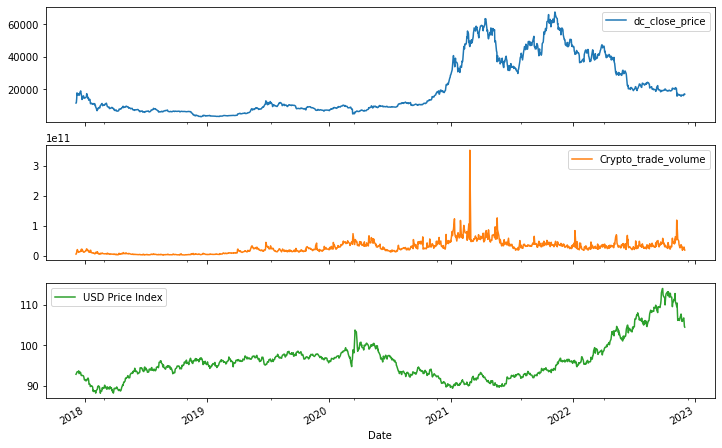

In [41]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

In [42]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [43]:
series = join

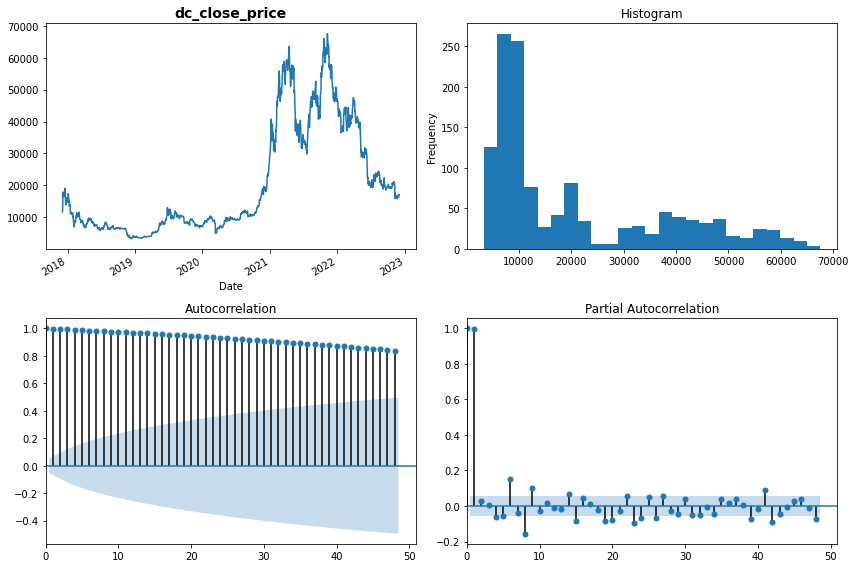

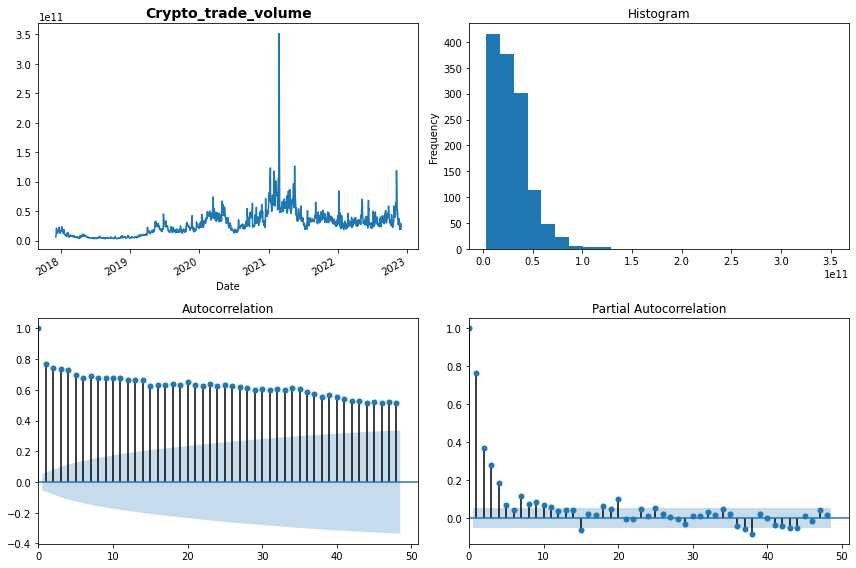

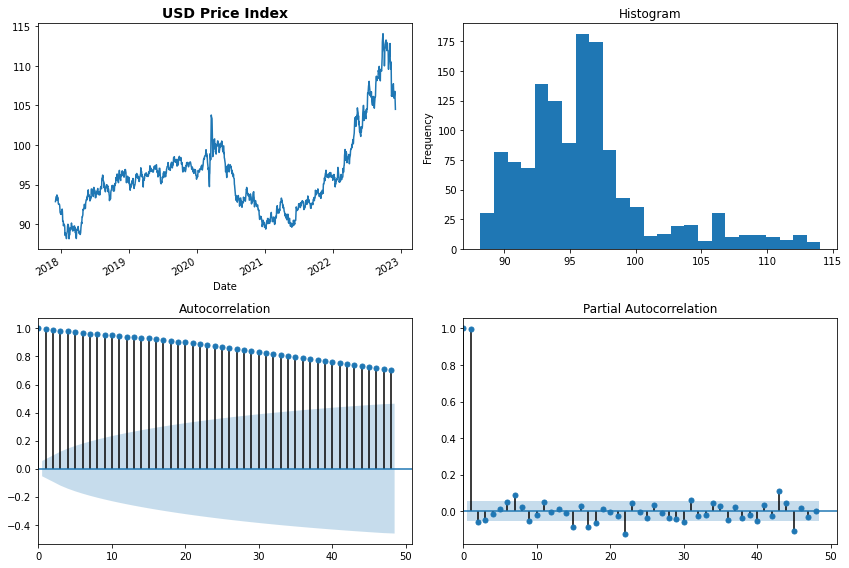

In [44]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

,dc_close_price,Crypto_trade_volume,USD Price Index
0,0.599267,0.734442,0.560187
1,0.487681,0.604465,0.534069
2,0.155992,0.616929,0.525824
3,0.541177,0.524728,0.527313
4,0.451744,0.777346,0.589202
...,...,...,...
1285,0.432988,0.776365,0.665813
1286,0.477271,0.552279,0.452246
1287,0.473986,0.716570,0.384518
1288,0.393418,0.566037,0.488902


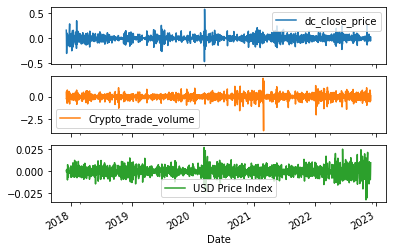

In [45]:
#log transformation
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

#normalization
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


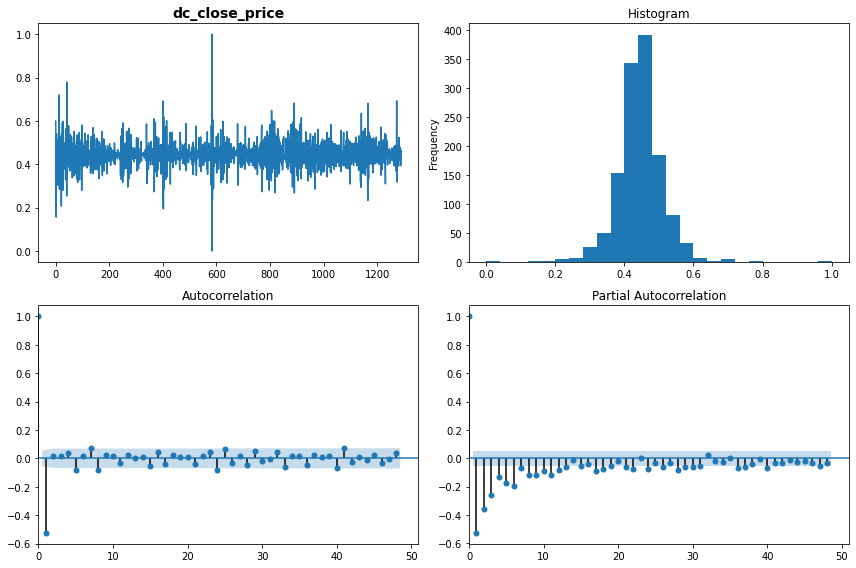

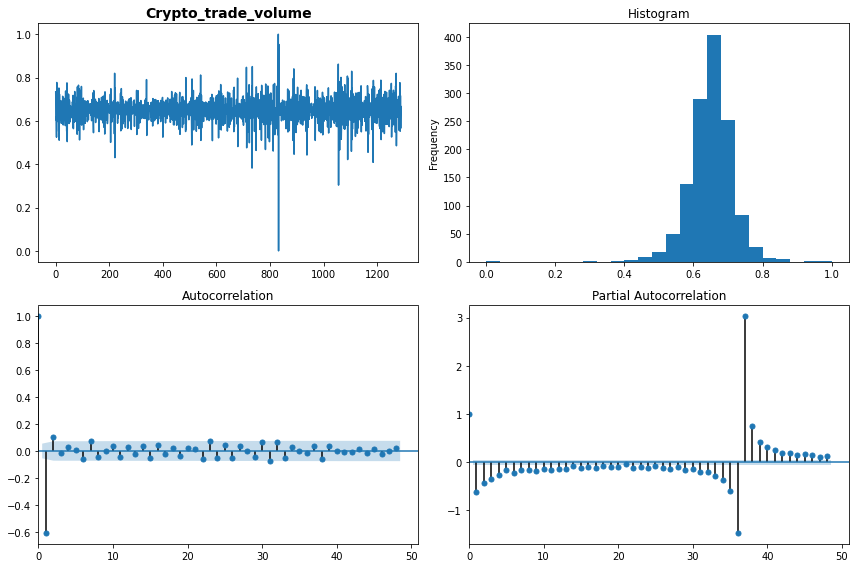

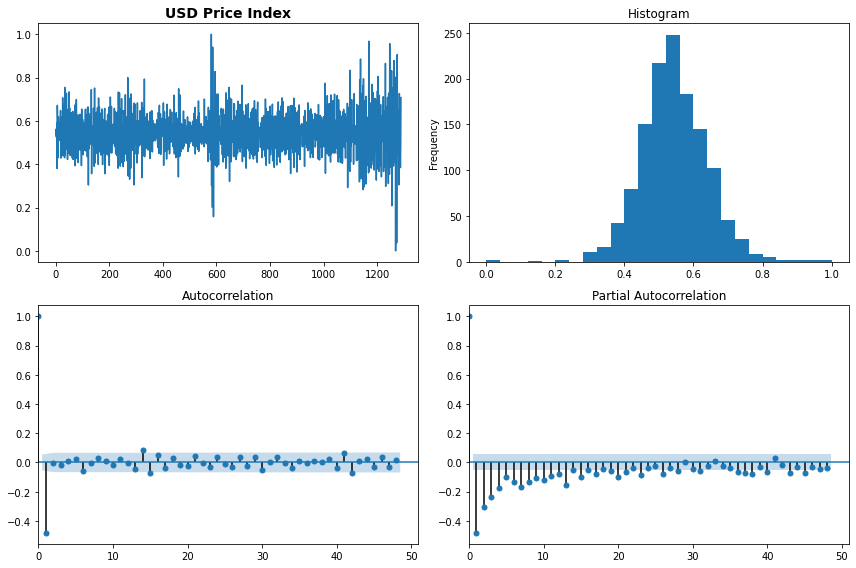

In [47]:
num_var = len(join_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

In [49]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
        
ad_test(log_diff["dc_close_price"])
print("--------------------------------------------")
ad_test(log_diff["Crypto_trade_volume"])
print("--------------------------------------------")
ad_test(log_diff["USD Price Index"])


1. ADF :  -12.471758103056407
2. P-Value :  3.233174503966664e-23
3. Num Of Lags :  23
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1266
5. Critical Values : 
	 1% :  -3.4355258362116787
	 5% :  -2.8638256788102323
	 10% :  -2.567986918482913
--------------------------------------------
1. ADF :  -13.790472952696499
2. P-Value :  8.945911484172921e-26
3. Num Of Lags :  23
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1266
5. Critical Values : 
	 1% :  -3.4355258362116787
	 5% :  -2.8638256788102323
	 10% :  -2.567986918482913
--------------------------------------------
1. ADF :  -13.880308374986347
2. P-Value :  6.228679343666984e-26
3. Num Of Lags :  22
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1267
5. Critical Values : 
	 1% :  -3.4355217427788793
	 5% :  -2.8638238726872296
	 10% :  -2.5679859566283705


# **FB PROPHET**

In [50]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [51]:
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

In [52]:
bc = pd.read_csv("/content/BTC-USD-DEC.csv")
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

,ds,y
0,2017-12-04,11657.200195
1,2017-12-05,11916.700195
2,2017-12-06,14291.500000
3,2017-12-07,17899.699219
4,2017-12-08,16569.400391


In [54]:
et = pd.read_csv("/content/ETH-USD _DEC1.csv")
et_price = et.drop(et.columns[[1,2,3,5,6]], axis=1)
et_vol = et.drop(et.columns[[1,2,3,4,5]], axis=1)
et_price.columns = ["ds","y"]
et_price.head()

,ds,y
0,2017-12-04,470.204010
1,2017-12-05,463.281006
2,2017-12-06,428.588013
3,2017-12-07,434.407990
4,2017-12-08,456.031006


In [55]:
dc = pd.read_csv("/content/DOGE-USD--DEC.csv")
dc_price = dc.drop(dc.columns[[1,2,3,5,6]], axis=1)
dc_vol = dc.drop(dc.columns[[1,2,3,4,5]], axis=1)
dc_price.columns = ["ds","y"]
dc_price.head()

,ds,y
0,2017-12-04,0.002463
1,2017-12-05,0.002479
2,2017-12-06,0.002663
3,2017-12-07,0.002720
4,2017-12-08,0.002779


In [56]:
print("Codes for cryptos., Bitcoin - bc, Ethereum -et, Dogecoin -dc\n")
crypto = input("Enter the crypto type you want to predict\n")
if crypto == "bc":
  model, forecast, future =fit_model(bc_price)
elif crypto == "et":
  model, forecast, future =fit_model(et_price)
elif crypto == "dc":
  model, forecast, future =fit_model(dc_price)
else:
  print("Please enter the valid detail")

Codes for cryptos., Bitcoin - bc, Ethereum -et, Dogecoin -dc

Enter the crypto type you want to predict
dc


DEBUG:cmdstanpy:input tempfile: /tmp/tmpy50wgg2w/mggaf486.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy50wgg2w/zffif91h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65420', 'data', 'file=/tmp/tmpy50wgg2w/mggaf486.json', 'init=/tmp/tmpy50wgg2w/zffif91h.json', 'output', 'file=/tmp/tmpy50wgg2w/prophet_model8i7ubdvr/prophet_model-20221205162247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
future.tail()

,ds
2187,2023-11-30
2188,2023-12-01
2189,2023-12-02
2190,2023-12-03
2191,2023-12-04


In [58]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2187,2023-11-30,-0.126369,-0.274334,0.028482
2188,2023-12-01,-0.126723,-0.277549,0.029947
2189,2023-12-02,-0.128356,-0.279302,0.024140
2190,2023-12-03,-0.129750,-0.283760,0.020339
2191,2023-12-04,-0.132110,-0.290594,0.020833


In [59]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

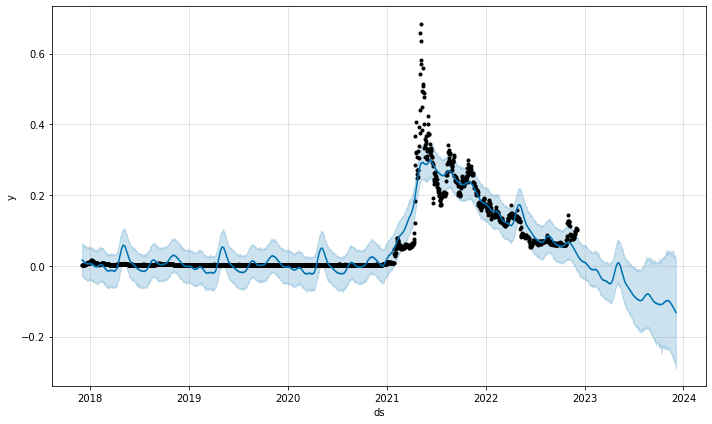

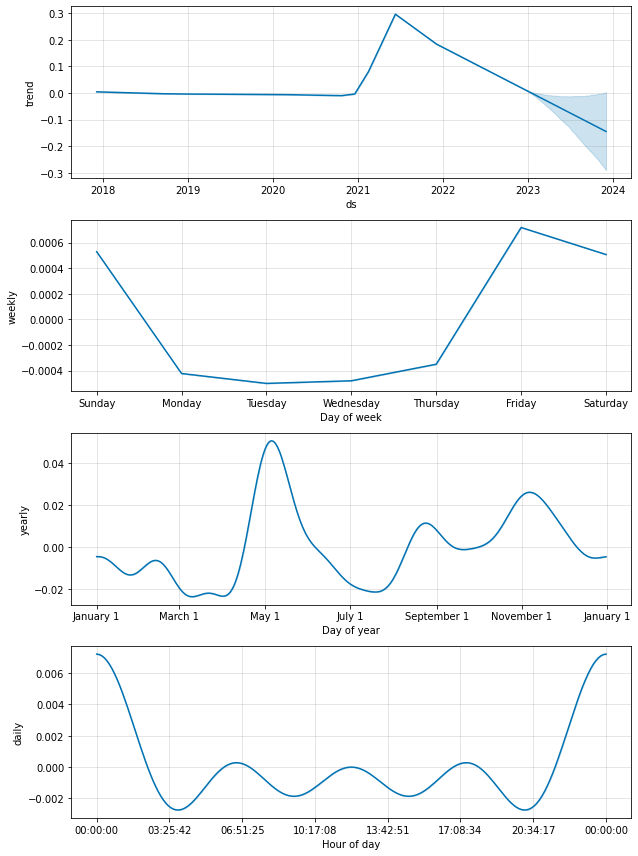

In [60]:
fb_subplots(model, forecast)

In [61]:
from prophet.diagnostics import cross_validation
bc_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
bc_cv.tail()

INFO:prophet:Making 5 forecasts with cutoffs between 2019-12-15 00:00:00 and 2021-12-04 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpy50wgg2w/d1ngonvm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy50wgg2w/228htgpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42234', 'data', 'file=/tmp/tmpy50wgg2w/d1ngonvm.json', 'init=/tmp/tmpy50wgg2w/228htgpj.json', 'output', 'file=/tmp/tmpy50wgg2w/prophet_model4q7wwme_/prophet_model-20221205162317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy50wgg2w/v3oi3_jr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy50wgg2w/z9bwtxko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1820,2022-11-30,0.566596,0.482579,0.643127,0.106860,2021-12-04
1821,2022-12-01,0.568255,0.487440,0.650694,0.101584,2021-12-04
1822,2022-12-02,0.571057,0.485358,0.648464,0.102148,2021-12-04
1823,2022-12-03,0.572132,0.483233,0.646113,0.099824,2021-12-04
1824,2022-12-04,0.574412,0.494673,0.651400,0.103867,2021-12-04


In [62]:
from prophet.diagnostics import performance_metrics
bc_p = performance_metrics(bc_cv)
bc_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.006445,0.080279,0.047338,0.490323,0.540057,0.434692,0.369231
1,38 days,0.006704,0.081876,0.048469,0.495359,0.540057,0.435644,0.363736
2,39 days,0.006981,0.083553,0.049678,0.501204,0.542963,0.437518,0.358242
3,40 days,0.007216,0.084947,0.050834,0.506639,0.542963,0.440248,0.352747
4,41 days,0.007434,0.086223,0.051965,0.512403,0.553416,0.444088,0.347253


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



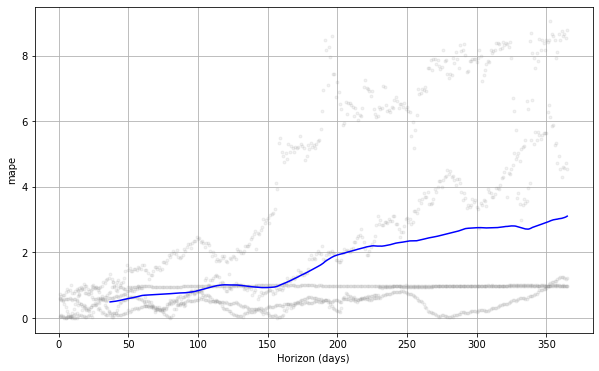

In [63]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(bc_cv, metric='mape')

In [64]:
#convert dataset into csv file
forecast.to_csv('bitcoin_forecast.csv')

#download dataset
from google.colab import files
files.download('bitcoin_forecast.csv')
     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Support Vector Machine***

In [65]:
import numpy as np
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

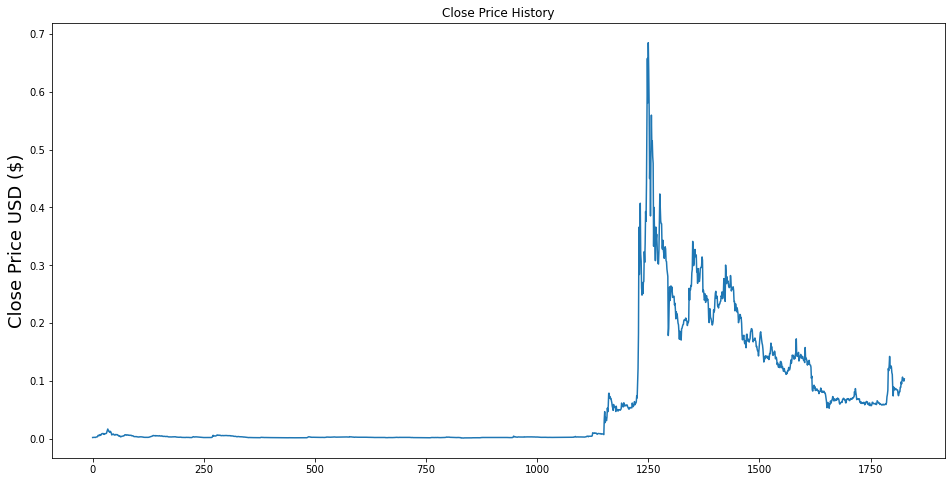

In [66]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dc['Close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [67]:
dc = dc[['Close']]
print(dc.head())

      Close
0  0.002463
1  0.002479
2  0.002663
3  0.002720
4  0.002779


In [68]:
dc.dropna(inplace=True)

In [69]:
forecast_out = 30
dc['Prediction'] = dc[['Close']].shift(-forecast_out)
print(dc.tail())

         Close  Prediction
1822  0.106860         NaN
1823  0.101584         NaN
1824  0.102148         NaN
1825  0.099824         NaN
1826  0.103867         NaN


In [70]:
X = np.array(dc.drop(['Prediction'],1))
X = X[:-forecast_out]
print(X)

[[0.002463]
 [0.002479]
 [0.002663]
 ...
 [0.12783 ]
 [0.122592]
 [0.12628 ]]


<ipython-input-70-4a4198f03340>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [71]:
y = np.array(dc['Prediction'])
y = y[:-forecast_out]
print(y)

[0.00932  0.009644 0.012167 ... 0.102148 0.099824 0.103867]


In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [73]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [74]:
x_forecast = np.array(dc.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[0.124388]
 [0.114606]
 [0.111299]
 [0.08841 ]
 [0.074288]
 [0.089789]
 [0.084885]
 [0.088039]
 [0.084893]
 [0.085879]
 [0.086971]
 [0.085583]
 [0.084765]
 [0.084672]
 [0.084581]
 [0.077174]
 [0.074711]
 [0.078488]
 [0.081786]
 [0.081481]
 [0.089475]
 [0.088988]
 [0.098712]
 [0.095122]
 [0.101853]
 [0.10686 ]
 [0.101584]
 [0.102148]
 [0.099824]
 [0.103867]]


<ipython-input-74-3cfe6ca733a6>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [75]:
import math
data = dc.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len 

1462

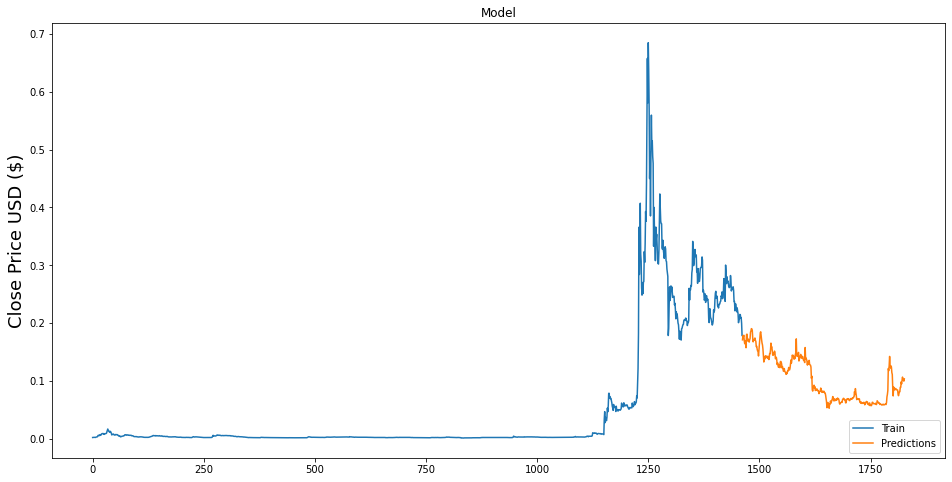

In [76]:
train = dc[:training_data_len]
valid = dc[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

In [77]:
# Predicting the target values of the test set
from sklearn.metrics import mean_squared_error
y_forecast = svr_rbf.predict(x_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test,y_forecast)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.093
